Загрузим данные, разделим их на обучающую и тестовую выборки

In [2]:
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 52s 0us/step
(40000, 32, 32, 3) (40000, 1)


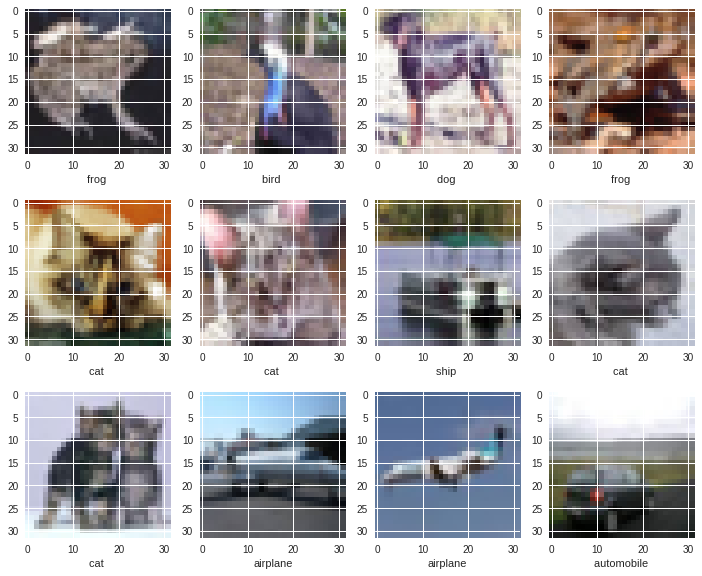

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

# Подготовка данных

Давайте приведём все данные в диапазон __`[0, 1]`__ — просто разделим на соответствующий коэффициент:

In [0]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

**Архитектура**
1. принимает на вход картинки размера 32 x 32 x 3;
2. flatten
3. 1 или 2 полносвязных слоя
4. выходной слой отдает вероятности принадлежности к каждому из 10 классов.

In [0]:
import keras, keras.layers as L

Создаем полносвязную сеть:

In [0]:
def build_model(hid_size):
  
    model = keras.Sequential()
    model.add(L.InputLayer(input_shape=[32,32, 3]))
    model.add(L.Flatten(input_shape=[32, 32, 3]))
    model.add(L.Dense(hid_size, activation='relu'))
    model.add(L.Dense(hid_size // 2, activation='relu'))
    model.add(L.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
    return model


model = build_model(64)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint


In [16]:
epochs = 30
batch_size=256

tensorbord = TensorBoard(log_dir='./logs/first_logs')
stopper = EarlyStopping(monitor='val_loss', patience=5)
checkpoints = ModelCheckpoint(filepath='./checkpoints', save_best_only=True, mode='max', monitor='val_sparse_categorical_accuracy')

model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=[X_val, y_val], callbacks=[tensorbord, stopper, checkpoints])
model = keras.models.load_model('./checkpoints')

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 2s 48us/step - loss: 2.0447 - sparse_categorical_accuracy: 0.2654 - val_loss: 1.9217 - val_sparse_categorical_accuracy: 0.3239
Epoch 2/30
40000/40000 [==============================] - 2s 46us/step - loss: 1.8360 - sparse_categorical_accuracy: 0.3495 - val_loss: 1.7954 - val_sparse_categorical_accuracy: 0.3575
Epoch 3/30
40000/40000 [==============================] - 2s 46us/step - loss: 1.7689 - sparse_categorical_accuracy: 0.3769 - val_loss: 1.7319 - val_sparse_categorical_accuracy: 0.3807
Epoch 4/30
40000/40000 [==============================] - 2s 45us/step - loss: 1.7232 - sparse_categorical_accuracy: 0.3920 - val_loss: 1.7061 - val_sparse_categorical_accuracy: 0.3972
Epoch 5/30
40000/40000 [==============================] - 2s 46us/step - loss: 1.6915 - sparse_categorical_accuracy: 0.4017 - val_loss: 1.6733 - val_sparse_categorical_accuracy: 0.4068
Epoch 6/30
40000/40000 [=

In [17]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
print(" Not bad!")


 Test_acc = 0.459
 Not bad!


Карманная сверточная сеть

**Архитектура**
1. Входной слой
2. Свёртка 3x3 с 10 фильтрами
3. Нелинейность relu
4. Max-pooling 2x2
5. Flatten
6. Полносвязный слой на 100 нейронов
7. relu
8. softmax

Обучим её так же, как и предыдущую сеть. 

In [0]:
def build_cnn_model():
    model = keras.Sequential()
    model.add(L.InputLayer(input_shape=(32, 32 ,3)))
    model.add(L.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'))
    model.add(L.MaxPool2D(pool_size=(2, 2)))
    model.add(L.Flatten())
    model.add(L.Dense(100, activation='relu'))
    model.add(L.Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['sparse_categorical_accuracy'])
    return model


In [0]:
model = build_cnn_model()

In [25]:
epochs = 30
batch_size=256

tensorbord = TensorBoard(log_dir='./logs/first_logs')
stopper = EarlyStopping(monitor='val_loss', patience=5)
checkpoints = ModelCheckpoint(filepath='./checkpoints', save_best_only=True, mode='max', monitor='val_sparse_categorical_accuracy')

model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs * 2, validation_data=[X_val, y_val], callbacks=[tensorbord, stopper, checkpoints])
model = keras.models.load_model('./checkpoints')

Train on 40000 samples, validate on 10000 samples
Epoch 1/60
40000/40000 [==============================] - 2s 57us/step - loss: 1.8158 - sparse_categorical_accuracy: 0.3665 - val_loss: 1.9080 - val_sparse_categorical_accuracy: 0.3119
Epoch 2/60
40000/40000 [==============================] - 2s 57us/step - loss: 1.7871 - sparse_categorical_accuracy: 0.3771 - val_loss: 1.7800 - val_sparse_categorical_accuracy: 0.3744
Epoch 3/60
40000/40000 [==============================] - 2s 57us/step - loss: 1.7563 - sparse_categorical_accuracy: 0.3887 - val_loss: 1.7620 - val_sparse_categorical_accuracy: 0.3789
Epoch 4/60
40000/40000 [==============================] - 2s 57us/step - loss: 1.7339 - sparse_categorical_accuracy: 0.3953 - val_loss: 1.8105 - val_sparse_categorical_accuracy: 0.3618
Epoch 5/60
40000/40000 [==============================] - 2s 57us/step - loss: 1.7095 - sparse_categorical_accuracy: 0.4033 - val_loss: 1.7275 - val_sparse_categorical_accuracy: 0.3850
Epoch 6/60
40000/40000 [=

Давайте посмотрим, смогла ли карманная сверточная сеть побить заданный порог по качеству:

In [26]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
print(" Not bad!")


 Test_acc = 0.5672
 Not bad!


Теперь давайте попробуем обучить модель используя все предлагаемые параметры(например, кол-во слоев, дропаут, оптимизаторы, batch-norm'ы)

In [0]:
def build_model():
    model = keras.Sequential()
    model.add(L.InputLayer(input_shape=(32, 32 ,3)))
    model.add(L.Conv2D(filters=64, kernel_size=(3, 3)))
    model.add(L.BatchNormalization())
    model.add(L.Activation('relu'))
    model.add(L.MaxPool2D(pool_size=(2, 2)))
    model.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(L.Flatten())
    model.add(L.Dense(512))
    model.add(L.Activation('relu'))
    model.add(L.BatchNormalization())
    model.add(L.Dense(10))
    model.add(L.Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
    return model

Добавляем 2 сверточных слоя с пулингами:

In [47]:
model = build_model()
stopper = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, batch_size=64, epochs=75, validation_data=[X_val, y_val], callbacks=[stopper, checkpoints])
model = keras.models.load_model('./checkpoints')

Train on 40000 samples, validate on 10000 samples
Epoch 1/75
40000/40000 [==============================] - 15s 373us/step - loss: 1.3319 - sparse_categorical_accuracy: 0.5366 - val_loss: 1.6540 - val_sparse_categorical_accuracy: 0.4718
Epoch 2/75
40000/40000 [==============================] - 13s 318us/step - loss: 1.0489 - sparse_categorical_accuracy: 0.6368 - val_loss: 1.5576 - val_sparse_categorical_accuracy: 0.5063
Epoch 3/75
40000/40000 [==============================] - 13s 316us/step - loss: 0.9396 - sparse_categorical_accuracy: 0.6768 - val_loss: 1.2279 - val_sparse_categorical_accuracy: 0.5846
Epoch 4/75
40000/40000 [==============================] - 12s 311us/step - loss: 0.8559 - sparse_categorical_accuracy: 0.7038 - val_loss: 1.3185 - val_sparse_categorical_accuracy: 0.5758
Epoch 5/75
40000/40000 [==============================] - 12s 311us/step - loss: 0.7972 - sparse_categorical_accuracy: 0.7217 - val_loss: 1.1476 - val_sparse_categorical_accuracy: 0.6140
Epoch 6/75
4000

In [48]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)



 Test_acc = 0.6906


Добавляем дропаут

In [0]:
def build_model():
    model = keras.Sequential()
    model.add(L.InputLayer(input_shape=(32, 32 ,3)))
    model.add(L.Conv2D(filters=64, kernel_size=(3, 3)))
    model.add(L.BatchNormalization())
    model.add(L.Activation('relu'))
    model.add(L.MaxPool2D(pool_size=(2, 2)))
    model.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))
    model.add(L.Dropout(0.25))

    model.add(L.Flatten())
    model.add(L.Dense(512))
    model.add(L.Activation('relu'))
    model.add(L.BatchNormalization())
    model.add(L.Dense(10))
    model.add(L.Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
    return model

In [54]:
model = build_model()
model.fit(X_train, y_train, batch_size=64, epochs=75, validation_data=[X_val, y_val], callbacks=[stopper, checkpoints])
model = keras.models.load_model('./checkpoints')

Train on 40000 samples, validate on 10000 samples
Epoch 1/75
40000/40000 [==============================] - 16s 391us/step - loss: 1.4856 - sparse_categorical_accuracy: 0.4826 - val_loss: 1.3858 - val_sparse_categorical_accuracy: 0.5284
Epoch 2/75
40000/40000 [==============================] - 13s 322us/step - loss: 1.1317 - sparse_categorical_accuracy: 0.6026 - val_loss: 1.9291 - val_sparse_categorical_accuracy: 0.4588
Epoch 3/75
40000/40000 [==============================] - 13s 319us/step - loss: 0.9958 - sparse_categorical_accuracy: 0.6531 - val_loss: 1.0373 - val_sparse_categorical_accuracy: 0.6430
Epoch 4/75
40000/40000 [==============================] - 13s 318us/step - loss: 0.8994 - sparse_categorical_accuracy: 0.6879 - val_loss: 1.6262 - val_sparse_categorical_accuracy: 0.4936
Epoch 5/75
40000/40000 [==============================] - 13s 314us/step - loss: 0.8351 - sparse_categorical_accuracy: 0.7088 - val_loss: 1.0187 - val_sparse_categorical_accuracy: 0.6597
Epoch 6/75
4000

In [55]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)



 Test_acc = 0.7266


In [0]:
def build_model():
    model = keras.Sequential()
    model.add(L.InputLayer(input_shape=(32, 32 ,3)))
    model.add(L.Conv2D(filters=128, kernel_size=(3, 3)))
    model.add(L.BatchNormalization())
    model.add(L.Activation('relu'))
    model.add(L.MaxPool2D(pool_size=(2, 2)))
    model.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))
    model.add(L.Dropout(0.25))

    model.add(L.Flatten())
    model.add(L.Dense(128))
    model.add(L.Activation('relu'))
    model.add(L.BatchNormalization())
    model.add(L.Dense(32))
    model.add(L.Activation('relu'))
    model.add(L.Dense(10))
    model.add(L.Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
    return model

In [65]:
model = build_model()
model.fit(X_train, y_train, batch_size=64, epochs=75, validation_data=[X_val, y_val], callbacks=[stopper, checkpoints])
model = keras.models.load_model('./checkpoints')

test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)


Train on 40000 samples, validate on 10000 samples
Epoch 1/75
40000/40000 [==============================] - 20s 489us/step - loss: 1.4847 - sparse_categorical_accuracy: 0.4696 - val_loss: 1.5835 - val_sparse_categorical_accuracy: 0.4510
Epoch 2/75
40000/40000 [==============================] - 16s 391us/step - loss: 1.1316 - sparse_categorical_accuracy: 0.6010 - val_loss: 1.6531 - val_sparse_categorical_accuracy: 0.4418
Epoch 3/75
40000/40000 [==============================] - 16s 392us/step - loss: 0.9821 - sparse_categorical_accuracy: 0.6541 - val_loss: 1.4402 - val_sparse_categorical_accuracy: 0.5168
Epoch 4/75
40000/40000 [==============================] - 16s 391us/step - loss: 0.8902 - sparse_categorical_accuracy: 0.6892 - val_loss: 1.0437 - val_sparse_categorical_accuracy: 0.6344
Epoch 5/75
40000/40000 [==============================] - 16s 392us/step - loss: 0.8141 - sparse_categorical_accuracy: 0.7129 - val_loss: 1.1163 - val_sparse_categorical_accuracy: 0.6176
Epoch 6/75
4000

Докрутим Conv слоев чтобы достать больше признаков

In [0]:
    def build_model():
    model = keras.Sequential()
    model.add(L.InputLayer(input_shape=[32, 32, 3]))

    model.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(L.BatchNormalization())
    model.add(L.MaxPool2D(pool_size=(2, 2)))  

    model.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add( L.BatchNormalization())

    model.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(L.BatchNormalization())
    model.add(L.MaxPool2D(pool_size=(2, 2)))  

    model.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model.add(L.BatchNormalization())
    model.add(L.MaxPool2D(pool_size=(2, 2)))  

    model.add(L.Flatten())
    model.add(L.Dense(10, activation='softmax'))  
    opt = keras.optimizers.Adam(lr=1e-3)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['sparse_categorical_accuracy'])
    return model

In [38]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_40 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_41 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 128)       73856     
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.15)

datagen.fit(X_train)

In [0]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
checkpoints = ModelCheckpoint(filepath='./checkpoints', save_best_only=True, mode='max', monitor='val_sparse_categorical_accuracy')


In [0]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=150, validation_data=[X_val, y_val], callbacks=[checkpoints])
#model = keras.models.load_model('./checkpoints')


In [0]:
b_model = keras.models.load_model('./checkpoints')

In [1]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, b_model.predict_classes(X_test))
print("\n Test_acc =", test_acc)

Test_acc = 0.8244
